In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/riped_tomato_93.txt
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/riped_tomato_51.txt
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/unriped_tomato_11.txt
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/riped_tomato_16.txt
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/unriped_tomato_45.txt
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/riped_tomato_96.txt
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/riped_tomato_91.txt
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/riped_tomato_90.txt
/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels/unriped_tomato_2.txt
/kaggle/input/riped-and-unriped-

In [3]:
import numpy as np 
from PIL import Image
from tensorflow.keras.preprocessing import image

2024-07-24 04:21:15.029142: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-24 04:21:15.029301: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-24 04:21:15.210937: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
from keras.applications.vgg16 import VGG16
from sklearn.metrics.pairwise import cosine_similarity

Configuring the VGG16 Model for Image Embedding Extraction and understanding its parameters

In [6]:
vgg16 = VGG16(weights='imagenet', include_top=False,
              pooling='max', input_shape=(224, 224, 3))

# print the summary of the model's atchitecture.
vgg16.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 512)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
for model_layer in vgg16.layers:
    model_layer.trainable = False

In [8]:
# images and labels directory
images_dir = '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images'
labels_dir = '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels'

In [9]:
def load_image(images_dir):
    """
        -----------------------------------------------------
        Process the image provided. 
        - Resize the image 
        -----------------------------------------------------
        return resized image
    """
    input_image = Image.open(images_dir)
    resized_image = input_image.resize((224, 224))
    
    return resized_image
        

In [10]:
def get_image_embeddings(object_image : image):
    
    """
      -----------------------------------------------------
      convert image into 3d array and add additional dimension for model input
      -----------------------------------------------------
      return embeddings of the given image
    """

    image_array = np.expand_dims(image.img_to_array(object_image), axis = 0)
    image_embedding = vgg16.predict(image_array)

    return image_embedding

In [11]:
def get_simillarity_score(first_image : str, second_image: str):
    """
        -----------------------------------------------------
        Takes image array and computes its embedding using VGG16 model.
        -----------------------------------------------------
        return embedding of the image
        
    """
    first_image = load_image(first_image)
    second_image = load_image(second_image)
    
    first_image_vector = get_image_embeddings(first_image)
    second_image_vector = get_image_embeddings(second_image)
    
    similarity_score = cosine_similarity(first_image_vector, second_image_vector).reshape(1,)
    
    return similarity_score

In [15]:
def show_image(images_dir):
    image = mpimg.imread(images_dir)
    imageplot = plt.imshow(image)
    plt.show(images_dir)

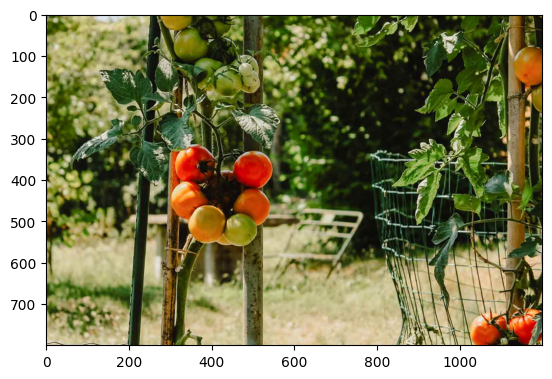

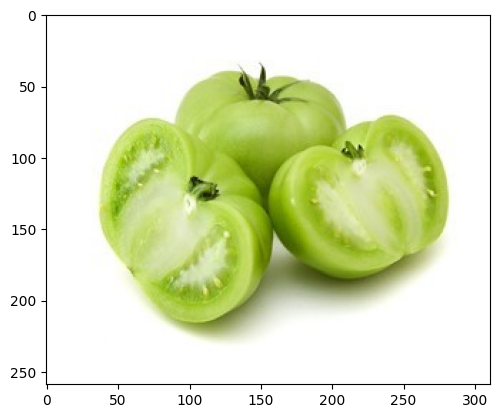

(None, None)

In [27]:
# define the path of the images
images_dir = '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images'
labels_dir = '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/labels'

tomato_1 = '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images/riped_tomato_74.jpeg'
tomato_2 = '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images/unriped_tomato_23.jpeg'

# use the show_image function to plot the images
show_image(tomato_1), show_image(tomato_2)

In [3]:
# In similarity.py



# In your current script
from similarity import get_similarity_score

tomato_1 = '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images/riped_tomato_74.jpeg'
tomato_2 = '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images/unriped_tomato_23.jpeg'

similarity_score = get_similarity_score(tomato_1, tomato_2)
print(similarity_score)

ModuleNotFoundError: No module named 'similarity'

In [5]:
# In similarity.py
def get_similarity_score(tomato_1, tomato_2):
    from difflib import SequenceMatcher
    return SequenceMatcher(None, tomato_1, tomato_2).ratio()

In [6]:
# In your current script
from similarity import get_similarity_score

tomato_1 = '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images/riped_tomato_74.jpeg'
tomato_2 = '/kaggle/input/riped-and-unriped-tomato-dataset/Riped and Unriped Tomato Dataset/Images/unriped_tomato_23.jpeg'

similarity_score = get_similarity_score(tomato_1, tomato_2)
print(similarity_score)

ModuleNotFoundError: No module named 'similarity'